In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.pool import QueuePool
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option("display.max_columns", 100)

In [2]:
db_uri = ""
engine = create_engine(db_uri, poolclass=QueuePool, pool_size=10, max_overflow=20)

In [3]:
query = f"""
select *
from backtesting_output
"""

In [4]:
with engine.connect() as connection:
    df = pd.read_sql(query, connection)

In [5]:
#df.to_csv("../data/backtesting_output_old_version.csv")

In [6]:
df.shape

(11355, 37)

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(11355, 37)
(11355, 37)


In [8]:
# companies we invested in less than 3 years ago and no return has been realized should not count
# because we do not have all the period to assess
print(df.shape)
newest_possible_date = (datetime.today() -pd.DateOffset(days=3*365))
df = df[~((df["min_price_date"] > newest_possible_date) & (pd.isna(df["doubling_return_delay"])))]
print(df.shape)

(11355, 37)
(8234, 37)


In [9]:
df.head()

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
0,000020.KS,2010-12-31,2019-12-31,Q4,Q4,2.760773e+07,2.764313e+07,2.766473e+07,2.766473e+07,2.793123e+07,27931230.0,2.793123e+07,2.793123e+07,2.774848e+07,NaN,1.07,-0.52,2020-03-19,4800.00,2020-08-11,34450.000000,5806.454551,4152.013989,17.33,-15.61,0.40,9600.00,2022-11-16,2.66,617.71,5760.000,27560.000000,0.80,-38.73,5760.000,545.00,listed
1,000031.SZ,2004-12-31,2013-12-31,Q4,Q4,1.610764e+09,2.447173e+09,1.460152e+09,1.597120e+09,1.874087e+09,921647714.0,1.378731e+09,1.265623e+09,1.265623e+09,1.265623e+09,-40.30,20.82,2014-03-10,3.14,2015-08-17,24.500000,3.316428,-3.487720,5.32,190.03,1.44,6.28,2014-11-28,0.72,680.25,3.768,19.600000,-13.62,208.04,3.768,605.04,listed
2,000040.SZ,2007-06-30,2016-06-30,Q2,Q2,4.667678e+08,4.636199e+08,3.419573e+08,4.798155e+08,4.516530e+08,460034239.0,5.578232e+08,4.585546e+08,4.891740e+08,4.490010e+08,10.50,-7.24,2016-07-04,11.50,2017-04-14,17.049999,20.735358,18.689117,44.54,38.47,0.78,23.00,NaT,NaN,48.26,13.800,13.639999,33.45,26.16,13.800,-1.67,listed
3,000105.KS,2007-12-31,2016-12-31,Q4,Q4,1.378030e+07,1.378030e+07,1.378030e+07,1.378030e+07,1.378030e+07,13780300.0,1.378030e+07,1.378030e+07,1.378030e+07,NaN,0.00,0.00,2017-03-08,30200.00,2018-11-06,59200.000000,36207.609193,22249.552459,16.59,-35.73,1.67,60400.00,NaT,NaN,96.03,36240.000,47360.000000,-0.09,-62.88,36240.000,44.19,listed
4,000227.KS,2007-09-30,2016-09-30,Q3,Q3,3.634959e+06,3.634959e+06,3.634959e+06,3.634959e+06,3.634959e+06,3634959.0,3.634959e+06,3.634959e+06,3.634959e+06,NaN,0.00,0.00,2016-11-24,5475.00,2017-08-16,19000.000000,5603.422487,6886.681968,2.29,20.50,0.73,10950.00,2018-06-19,1.57,247.03,6570.000,15200.000000,-17.25,4.60,6570.000,189.15,listed


In [10]:
df.describe()

/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ref_report_date,report_date,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif
count,8234,8234,5.087000e+03,7.671000e+03,7.668000e+03,7.545000e+03,7.489000e+03,7.422000e+03,7.306000e+03,7.132000e+03,6.925000e+03,6.340000e+03,7.647000e+03,7.215000e+03,8234,8.234000e+03,8234,8.234000e+03,5.086000e+03,5.086000e+03,5086.000000,5086.0000,8234.000000,8.234000e+03,5331,5331.000000,8234.000,8.234000e+03,8.234000e+03,5086.000000,5086.0000,8.234000e+03,8234.0000
mean,2009-09-17 17:14:16.060238080,2018-03-21 14:55:45.542871040,1.390958e+09,1.074038e+10,6.480509e+09,2.369765e+09,1.087557e+09,9.773327e+08,9.518928e+08,1.151057e+09,2.414729e+09,9.555450e+08,1.147973e+04,1.541856e+15,2018-05-26 12:06:49.230021888,2.544571e+06,2019-08-13 13:58:13.320378880,1.439437e+07,4.810084e+06,-1.627100e+06,47.863205,-inf,1.216664,5.089142e+06,2020-01-04 16:39:58.649409280,1.201883,inf,3.053485e+06,1.151550e+07,37.435865,-inf,3.053485e+06,inf
min,1986-12-31 00:00:00,1995-12-31 00:00:00,-1.900000e+07,-3.065260e+05,0.000000e+00,-1.000000e+06,-7.200000e-01,-4.592600e+04,-4.493750e+05,-2.334190e+05,-3.000000e+04,0.000000e+00,-2.232177e+04,-2.311271e+18,1996-03-08 00:00:00,0.000000e+00,1996-12-05 00:00:00,2.000000e-03,1.072189e-04,-9.920300e+09,0.000000,-inf,0.000000,0.000000e+00,1998-02-20 00:00:00,0.000000,0.000,0.000000e+00,1.600000e-03,-20.000000,-inf,0.000000e+00,-48.0000
25%,2008-04-11 12:00:00,2017-02-27 06:00:00,7.020651e+06,5.860888e+06,4.622047e+06,2.785525e+06,2.111000e+06,1.585944e+06,1.239818e+06,1.042712e+06,7.896000e+05,6.625330e+05,-8.256000e+01,-4.761000e+01,2017-04-29 06:00:00,3.100000e-01,2018-05-17 00:00:00,1.720000e+00,7.176715e-01,3.862880e-02,16.112500,0.3125,0.370000,6.200000e-01,2019-03-30 12:00:00,0.380000,65.885,3.720000e-01,1.376000e+00,-0.665000,-19.6275,3.720000e-01,15.2525
50%,2010-09-30 00:00:00,2019-09-30 00:00:00,2.997500e+07,3.738506e+07,3.348918e+07,2.629222e+07,2.366517e+07,2.137741e+07,1.937272e+07,1.743923e+07,1.632594e+07,1.621910e+07,-2.277000e+01,-8.170000e+00,2020-03-12 00:00:00,3.012358e+00,2021-04-12 00:00:00,1.131500e+01,5.003801e+00,1.133000e+00,41.265000,57.7550,0.990000,6.024716e+00,2021-10-12 00:00:00,0.980000,144.700,3.614830e+00,9.052000e+00,29.520000,49.3050,3.614830e+00,90.9150
75%,2011-06-30 00:00:00,2020-06-30 00:00:00,1.610503e+08,3.058150e+08,3.057205e+08,2.601328e+08,2.420000e+08,2.271287e+08,2.192899e+08,2.014544e+08,1.926920e+08,1.999636e+08,0.000000e+00,0.000000e+00,2020-11-05 00:00:00,2.262750e+01,2022-06-15 18:00:00,6.193250e+01,6.426651e+01,1.733294e+01,83.077500,99.9500,2.020000,4.525500e+01,2023-03-23 00:00:00,1.950000,393.395,2.715300e+01,4.954600e+01,79.697500,99.9475,2.715300e+01,329.6600
max,2022-09-19 00:00:00,2023-09-22 00:00:00,2.115663e+12,6.918545e+13,2.240734e+13,9.728026e+12,5.392900e+11,4.409577e+11,3.776884e+11,1.458402e+12,1.030035e+13,1.469110e+12,8.796505e+07,1.275864e+19,2023-11-15 00:00:00,2.046915e+10,2024-01-04 00:00:00,5.976864e+10,2.251820e+10,1.671058e+09,100.000000,290813.0500,3.000000,4.093830e+10,2024-01-03 00:00:00,3.000000,inf,2.456298e+10,4.781491e+10,100.000000,348955.6600,2.456298e+10,inf
std,NaN,NaN,3.261543e+10,7.908182e+11,3.155127e+11,1.125861e+11,1.320829e+10,1.158822e+10,1.133520e+10,2.057339e+10,1.252657e+11,2.005751e+10,1.005924e+06,1.601265e+17,NaN,2.256328e+08,NaN,9.027063e+08,3.168830e+08,1.410688e+08,34.460832,NaN,0.949898,4.512657e+08,NaN,0.924058,NaN,2.707594e+08,7.221650e+08,41.352956,NaN,2.707594e+08,NaN


### Get rid of lines having a noisy ncav and liqv

In [11]:
print(df.shape)
df = df[(df["ncavps"] != -np.Inf) & (~pd.isna(df["ncavps"])) & (df["liqvps"] != -np.Inf) & (~pd.isna(df["liqvps"]))]
print(df.shape)

(8234, 37)
(5086, 37)


What are the things that I want to see on the potential companies that we considered?
- stats on highest return modif
- How many companies we chose to invest in more than once
- stats on 10y slope and 5y slope
- with how many companies we lost money
- how much we lost in average with the losing companies
- mos of winning and losing companies
- how many lines give 100% return vs how many do not
- how long does it take in average to double bag
- how long does it take to make the highest return modif on the winning ones

### Stats on the highest return (modif)

In [12]:
df["highest_return_modif"].describe()

/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    5086.000
mean          inf
std           NaN
min       -48.000
25%        32.000
50%       124.945
75%       523.275
max           inf
Name: highest_return_modif, dtype: float64

In [17]:
df.loc[df["highest_return_modif"] == np.Inf]

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
259,011210.KS,2013-12-31,2022-12-31,Q4,Q4,2.656232e+07,2.656164e+07,2.656173e+07,26561729.0,26561729.0,26561729.0,26561789.0,26561789.0,25730119.0,25730119.0,-2.71,-3.73,2023-01-24,0.0,2023-07-06,70500.0000,17116.841986,-28584.158958,100.0,100.0,0.45,0.0,2023-01-25,0.00,inf,0.0,56400.00000,100.0,100.0,0.0,inf,listed
263,011500.KS,2013-12-31,2022-12-31,Q4,Q4,1.521606e+07,1.529402e+07,1.529402e+07,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,0.25,0.00,2023-01-24,0.0,2023-04-24,31850.0000,2093.563651,4411.654187,100.0,100.0,0.25,0.0,2023-02-27,0.09,inf,0.0,25480.00000,100.0,100.0,0.0,inf,listed
275,012750.KS,2013-12-31,2022-12-31,Q4,Q4,3.381121e+07,3.381121e+07,3.381024e+07,33810239.0,33810239.0,33810239.0,33810239.0,33810239.0,33810239.0,33796239.0,-0.02,-0.03,2023-01-24,0.0,2023-12-14,63500.0000,11763.934641,8652.869355,100.0,100.0,0.89,0.0,2023-07-26,0.50,inf,0.0,50800.00000,100.0,100.0,0.0,inf,listed
424,030190.KQ,2013-12-31,2022-12-31,Q4,Q4,5.967123e+07,5.978279e+07,5.978279e+07,59782793.0,59782793.0,59480142.0,60705314.0,60750072.0,60729524.0,60594478.0,2.04,1.50,2023-02-20,0.0,2023-02-21,13820.0000,1746.459954,-403.546936,100.0,100.0,0.00,0.0,2023-07-31,0.44,inf,0.0,11056.00000,100.0,100.0,0.0,inf,listed
780,085370.KQ,2013-12-31,2022-12-31,Q4,Q4,2.591993e+07,8.098457e+06,1.242377e+07,25232367.0,20719609.0,9200196.0,9820659.0,20501672.0,21868947.0,19230849.0,6.12,132.38,2023-02-20,0.0,2023-09-14,37950.0000,4370.814541,2539.517039,100.0,100.0,0.56,0.0,2023-03-14,0.06,inf,0.0,30360.00000,100.0,100.0,0.0,inf,listed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10998,VRSB.ME,2013-03-31,2022-03-31,Q1,Q1,7.486770e+07,7.486540e+07,7.486640e+07,74864529.0,74763329.0,56151024.0,56046651.0,56046651.0,56151024.0,56151024.0,-32.66,0.07,2022-05-25,0.0,2023-02-15,304.4000,4.058199,0.002449,100.0,100.0,0.73,0.0,2022-10-10,0.38,inf,0.0,243.52000,100.0,100.0,0.0,inf,listed
11107,WEST3.SA,2020-09-30,2022-09-30,Q3,Q3,1.391058e+08,1.100118e+08,1.094768e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.05,-22.05,2022-11-15,0.0,2023-08-10,2.6700,1.455719,1.460296,100.0,100.0,0.73,0.0,2022-11-29,0.04,inf,0.0,2.13600,100.0,100.0,0.0,inf,listed
11126,WISE.L,2021-03-31,2023-03-31,Q4,Q4,1.052100e+09,1.037500e+09,1.013100e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.70,-3.70,2023-05-29,0.0,2023-12-28,890.0000,0.392833,-7.096914,100.0,100.0,0.58,0.0,2023-06-26,0.08,inf,0.0,712.00000,100.0,100.0,0.0,inf,listed
11141,WLBMF,1998-06-30,2007-06-30,Q2,Q2,7.586474e+07,5.076100e+07,4.467879e+07,35436365.0,29109241.0,25510941.0,25085941.0,13697180.0,10547180.0,10123180.0,-94.93,-69.57,2007-07-13,0.0,2007-07-13,0.6342,0.019261,0.137057,100.0,100.0,0.00,0.0,2008-12-19,1.44,inf,0.0,0.50736,100.0,100.0,0.0,inf,listed


### Get rid of the rows having highest_return_modif = np.Inf

In [18]:
print(df.shape)
df = df[df["highest_return_modif"] != np.Inf]
print(df.shape)

(5086, 37)
(4797, 37)


In [19]:
df["highest_return_modif"].describe()

count    4.797000e+03
mean     8.384274e+05
std      4.088350e+07
min     -4.800000e+01
25%      2.630000e+01
50%      1.105500e+02
75%      3.980400e+02
max      2.363272e+09
Name: highest_return_modif, dtype: float64

We still get very high returns

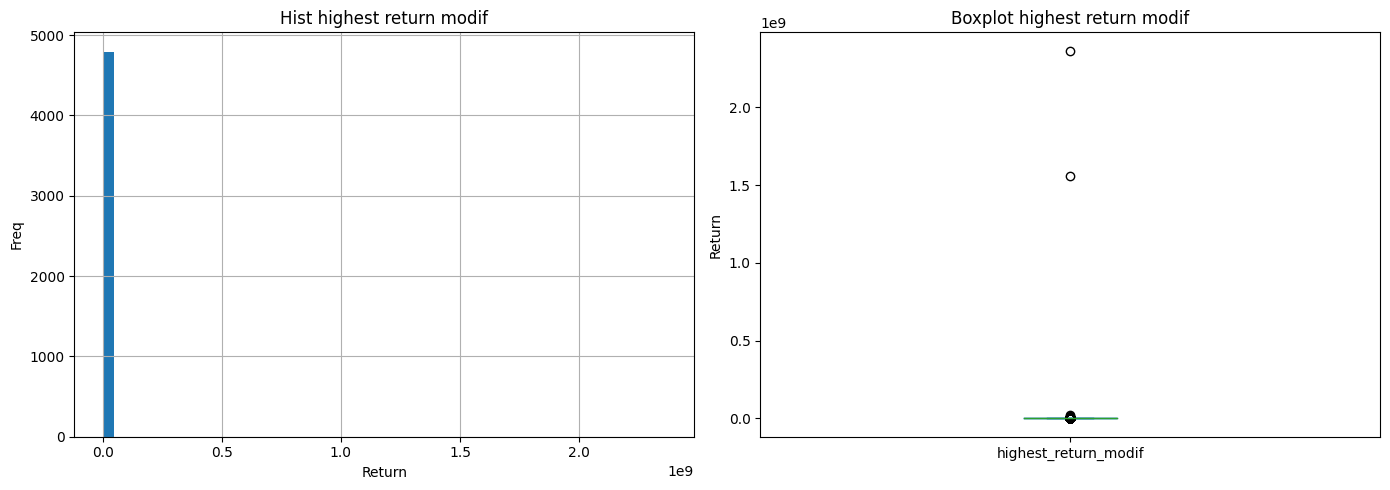

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df["highest_return_modif"].hist(bins=50, ax=ax[0])
df["highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist highest return modif")
ax[0].set_xlabel("Return")
ax[0].set_ylabel("Freq")
ax[1].set_title("Boxplot highest return modif")
ax[1].set_ylabel("Return");
plt.tight_layout()

In [22]:
df.sort_values(by="highest_return_modif", ascending=False).head(10)

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
2543,8303.T,2021-03-31,2023-03-31,Q4,Q4,204145689.0,206800879.0,216268074.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.97,5.97,2023-04-06,2274.000000,2023-09-27,5.598000e+10,10054.265706,9191.255418,77.38,75.26,0.48,4548.000000,2023-09-27,0.48,2.461741e+09,2728.800000,4.478400e+10,72.86,70.31,2728.800000,2.363272e+09,listed
6313,GSFI.TA,2016-12-31,2022-12-31,Q4,Q4,15682680.0,15014000.0,15014000.0,15014000.0,15014000.0,15014000.0,15014000.0,NaN,NaN,NaN,-2.81,0.00,2023-02-13,0.000100,2023-12-07,1.625000e+03,2.732569,-0.679444,100.00,100.01,0.81,0.000200,2023-03-16,0.08,1.625000e+09,0.000120,1.300000e+03,100.00,100.02,0.000120,1.560000e+09,listed
8753,PACV,1994-03-31,1997-05-15,Q1,Q1,281.0,284.0,285.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,-40.73,-40.73,2002-10-10,2.475248,2005-06-02,6.217822e+05,434875.444840,164697.508897,100.00,100.00,2.65,4.950495,2003-12-09,1.16,2.511990e+07,2.970297,4.974257e+05,100.00,100.00,2.970297,2.411506e+07,listed
4737,CNNC,2008-07-23,2011-08-22,Q2,Q2,20514.0,19300.0,18500.0,12550.0,NaN,NaN,NaN,NaN,NaN,NaN,-34.58,-34.58,2017-10-05,0.000400,2019-05-24,5.540000e+01,8.567612,22.184374,100.00,100.00,1.63,0.000800,2017-11-24,0.14,1.384990e+07,0.000480,4.432000e+01,99.99,100.00,0.000480,1.329586e+07,listed
5123,DFIFF,2010-03-31,2019-03-31,Q1,Q1,67895662.0,47344996.0,47344996.0,36025201.0,27643801.0,24977135.0,14488246.0,14481104.0,11878553.0,9384200.0,-95.32,-62.01,2019-06-10,0.000010,2021-03-22,1.003140e+00,0.014011,0.013938,99.93,99.93,1.78,0.000020,2020-05-07,0.91,1.003130e+07,0.000012,8.025120e-01,99.91,99.91,0.000012,9.630000e+06,listed
7300,KOAN,1998-08-12,2007-08-14,Q2,Q2,581.0,573.0,545.0,538.0,531.0,442.0,420.0,419.0,343.0,340.0,-43.71,-25.03,2012-04-16,0.002000,2014-09-16,2.000000e+02,2108.433735,1412.323580,100.00,100.00,2.42,0.004000,2012-11-28,0.62,9.999900e+06,0.002400,1.600000e+02,100.00,100.00,0.002400,9.599856e+06,listed
5657,EVTZF,2012-01-31,2021-01-31,Q3,Q3,76406389.0,76780796.0,76528720.0,76502893.0,75666776.0,74682278.0,75047300.0,74550102.0,73911680.0,73291263.0,-4.48,-2.09,2021-02-23,0.000200,2022-03-16,1.280000e+01,2.607805,2.071650,99.99,99.99,1.06,0.000400,2023-04-10,2.13,6.399900e+06,0.000240,1.024000e+01,99.99,99.99,0.000240,6.143856e+06,listed
8670,ORLA,2009-09-30,2018-09-30,Q3,Q3,179200000.0,128300000.0,31331946.0,17437924.0,5088549.0,4489000.0,3425000.0,2976521.0,1952661.0,1240000.0,-131.97,-72.28,2018-12-18,0.000100,2020-12-28,6.040000e+00,0.063442,0.606219,99.84,99.98,2.03,0.000200,2019-01-24,0.10,6.039900e+06,0.000120,4.832000e+00,99.81,99.98,0.000120,5.798256e+06,listed
9750,SHE.AX,2011-06-30,2020-06-30,Q4,Q4,51288623.0,51288623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-137.14,NaN,2020-07-17,0.004000,2021-12-28,1.028800e+02,0.037572,0.063335,89.35,93.68,1.45,0.008000,2020-11-18,0.34,2.571900e+06,0.004800,8.230400e+01,87.22,92.42,0.004800,2.468976e+06,listed
11111,WFSTF,2008-09-30,2017-09-30,Q3,Q3,400403000.0,399150000.0,398742000.0,399347000.0,432759000.0,470547000.0,474013000.0,476313000.0,473120000.0,204414000.0,-7.58,-40.52,2017-12-01,0.000100,2018-02-02,2.360000e+00,0.162836,0.445604,99.94,99.98,0.17,0.000200,2020-04-03,2.34,2.359900e+06,0.000120,1.888000e+00,99.93,99.97,0.000120,2.265456e+06,listed


There are some high returns on stocks I couldn't find. Also the biggest returns on the ones I found is because a reverse split happened in the middle of the period

A more conservative estimation is achieved by omitting the outliers (the positive ones)

In [23]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [24]:
df_wo_outliers["highest_return_modif"].describe()

count    4170.000000
mean      160.999326
std       211.904418
min       -48.000000
25%        15.032500
50%        84.090000
75%       223.250000
max       948.920000
Name: highest_return_modif, dtype: float64

* When getting rid of the outliers only the crazy positive returns are discarded (the losses are kept).
* We observe an average return of 160% with a max of 948% and a low of -48%.
* Note that the 50% of the samples have a return smaller than 84%
* There is a big std, which I would expect

### How many companies we invested on more than once

In [26]:
df_wo_outliers.loc[df_wo_outliers.duplicated(subset=["ticker"]), "ticker"].shape

(247,)

There are companies that appear as listed and delisted. We will get rid of the "listed" ones from this subset

In [29]:
print(df.shape)
df = df.drop_duplicates(subset=[col for col in df.columns if "ticker_type" not in col], keep="last")
print(df.shape)

(4797, 37)
(4797, 37)


In [31]:
df["highest_return_modif"].describe()

count    4.797000e+03
mean     8.384274e+05
std      4.088350e+07
min     -4.800000e+01
25%      2.630000e+01
50%      1.105500e+02
75%      3.980400e+02
max      2.363272e+09
Name: highest_return_modif, dtype: float64

In [32]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [33]:
df_wo_outliers["highest_return_modif"].describe()

count    4170.000000
mean      160.999326
std       211.904418
min       -48.000000
25%        15.032500
50%        84.090000
75%       223.250000
max       948.920000
Name: highest_return_modif, dtype: float64

### stats on 10y slope and 5y slope

In [34]:
df_wo_outliers[["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]].describe()

,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y
count,4.170000e+03,4.100000e+03
mean,2.109931e+04,2.514090e+15
std,1.362205e+06,2.005404e+17
min,-1.134580e+04,-9.379658e+17
25%,-7.408000e+01,-4.810750e+01
50%,-1.640000e+01,-7.165000e+00
75%,7.000000e-02,2.000000e-02
max,8.796505e+07,1.275864e+19


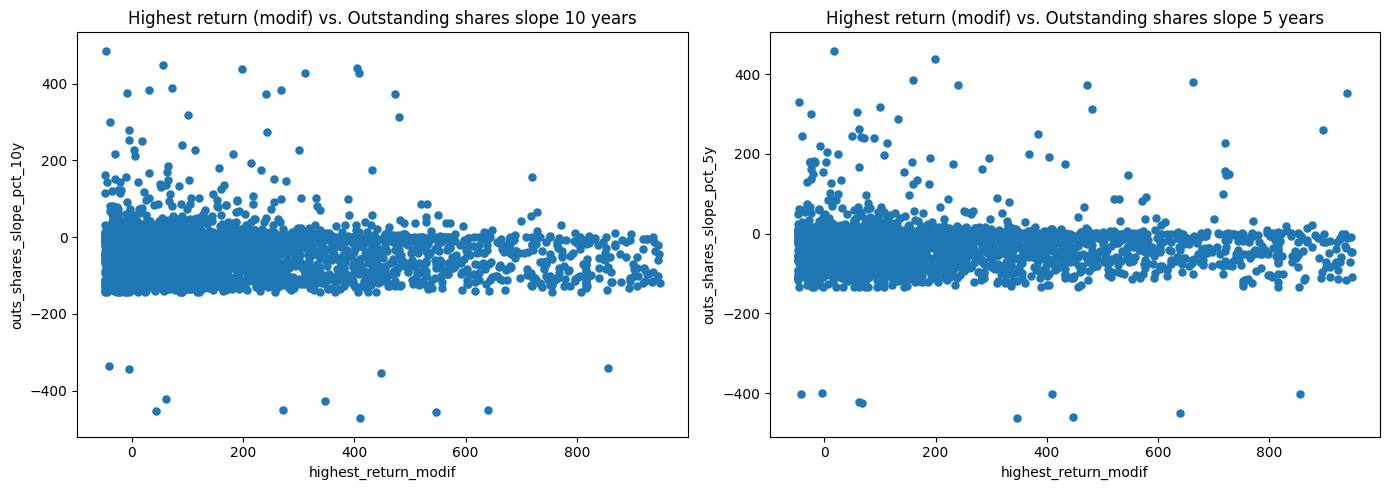

In [42]:
slope_thr = 500

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
condition_10y = (df_wo_outliers["outs_shares_slope_pct_10y"] > -slope_thr) & (df_wo_outliers["outs_shares_slope_pct_10y"] < slope_thr)
ax[0].scatter(df_wo_outliers.loc[condition_10y, "highest_return_modif"], df_wo_outliers.loc[condition_10y, "outs_shares_slope_pct_10y"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("outs_shares_slope_pct_10y")
ax[0].set_title("Highest return (modif) vs. Outstanding shares slope 10 years");

condition_5y = (df_wo_outliers["outs_shares_slope_pct_5y"] > -slope_thr) & (df_wo_outliers["outs_shares_slope_pct_5y"] < slope_thr)
ax[1].scatter(df_wo_outliers.loc[condition_5y, "highest_return_modif"], df_wo_outliers.loc[condition_5y, "outs_shares_slope_pct_5y"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("outs_shares_slope_pct_5y")
ax[1].set_title("Highest return (modif) vs. Outstanding shares slope 5 years");

plt.tight_layout()

In [41]:
df_wo_outliers.loc[df["highest_return_modif"] < 50, "outs_shares_slope_pct_10y"].describe(),  \
df_wo_outliers.loc[df["highest_return_modif"] >= 50, "outs_shares_slope_pct_10y"].describe()

(count     1497.000000
 mean       -29.664055
 std        364.902127
 min     -11345.800000
 25%        -51.940000
 50%         -4.930000
 75%          1.990000
 max       4079.480000
 Name: outs_shares_slope_pct_10y, dtype: float64,
 count    2.673000e+03
 mean     3.293249e+04
 std      1.701417e+06
 min     -3.664910e+03
 25%     -8.139000e+01
 50%     -2.769000e+01
 75%      0.000000e+00
 max      8.796505e+07
 Name: outs_shares_slope_pct_10y, dtype: float64)

* Counterintuitively the companies having a lower return have a more negative slope. It might be due to the negative outliers
* Note also that there are a lot of companies with a slope around 0 or negative but still low returns
* In general the greater the return the less the number of companies having a very positive slope. This can be more clearly observed for the 10 year slope

### Number of companies with which we lost money

In [46]:
nb_losing_money = df_wo_outliers[df_wo_outliers["highest_return_modif"] < 0].shape[0]
all_companies_wo_outliers = df_wo_outliers.shape[0]
losing_money_pct = round(100 * nb_losing_money / all_companies_wo_outliers, 2)
print(f"We lose money with {nb_losing_money} out of {all_companies_wo_outliers} companies. That is {losing_money_pct}% of the companies we put our money in")

We lose money with 822 out of 4170 companies. That is 19.71% of the companies we put our money in


### how much we lost in average with the losing companies

In [47]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "highest_return_modif"].describe()

count    822.000000
mean     -23.553212
std       13.677374
min      -48.000000
25%      -34.357500
50%      -23.385000
75%      -11.615000
max       -0.180000
Name: highest_return_modif, dtype: float64

Around 23.5%, with a max of 48% loss

### mos of winning and losing companies

In [48]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "ncav_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "ncav_mos"].describe()

(count    822.000000
 mean      45.421922
 std       36.134503
 min        0.080000
 25%       11.450000
 50%       34.905000
 75%       89.035000
 max      100.000000
 Name: ncav_mos, dtype: float64,
 count    3348.000000
 mean       41.351977
 std        31.365001
 min         0.000000
 25%        14.055000
 50%        33.865000
 75%        65.790000
 max       100.000000
 Name: ncav_mos, dtype: float64)

In [49]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "liqv_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "liqv_mos"].describe()

/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


(count       822.000000
 mean       1074.073163
 std       16052.536347
 min     -143800.910000
 25%          -3.280000
 50%          61.915000
 75%          99.420000
 max      290813.050000
 Name: liqv_mos, dtype: float64,
 count      3348.000
 mean           -inf
 std             NaN
 min            -inf
 25%         -11.785
 50%          39.915
 75%          96.010
 max      123075.830
 Name: liqv_mos, dtype: float64)

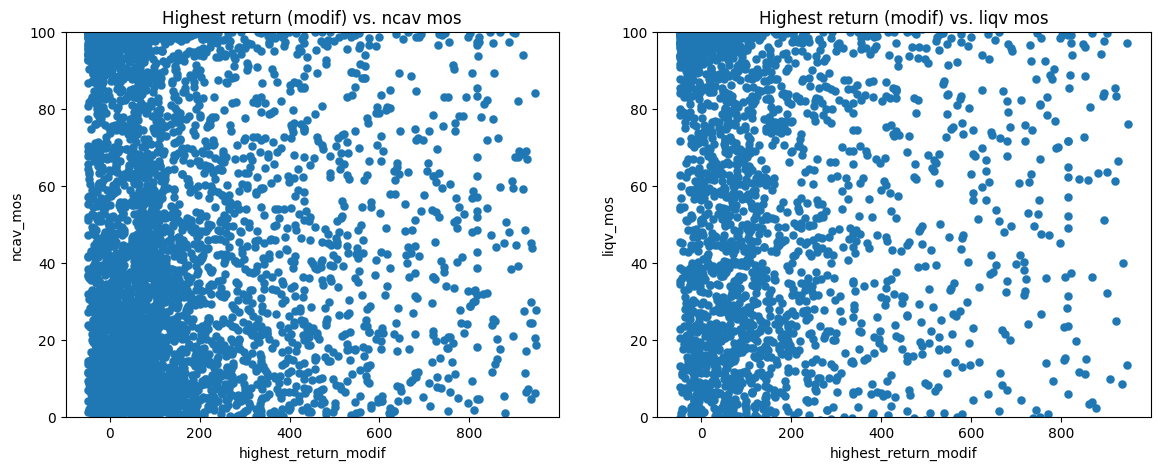

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["ncav_mos"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("ncav_mos")
ax[0].set_title("Highest return (modif) vs. ncav mos");
ax[0].set_ylim(0, 100)

ax[1].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["liqv_mos"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("liqv_mos")
ax[1].set_title("Highest return (modif) vs. liqv mos")
ax[1].set_ylim(0, 100);

- It does not seem like to mos of safety (ncav or liqv) are, by themselves, proxies of how good the return is going to be

### how many lines give 100% return vs how many do not

In [64]:
not100 = df_wo_outliers[df_wo_outliers["highest_return_modif"] < 100].shape[0]
print("Number of companies not giving 100% return: ", not100)
print(f"representing {round(100 * not100 / len(df_wo_outliers), 2)}")

Number of companies not giving 100% return:  2278
representing 54.63


In [66]:
yes100 = df_wo_outliers[df_wo_outliers["highest_return_modif"] >= 100].shape[0]
print("Number of companies giving 100% return: ", yes100)
print(f"representing {round(100 * yes100 / len(df_wo_outliers), 2)}")

Number of companies giving 100% return:  1892
representing 45.37


In [60]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].describe()

count    2278.000000
mean       23.566440
std        42.793445
min       -48.000000
25%       -14.932500
50%        21.890000
75%        62.215000
max        99.950000
Name: highest_return_modif, dtype: float64

Observe that the avg of the companies that do not double your money is 23.5, with more than 50% giving less than 22%.

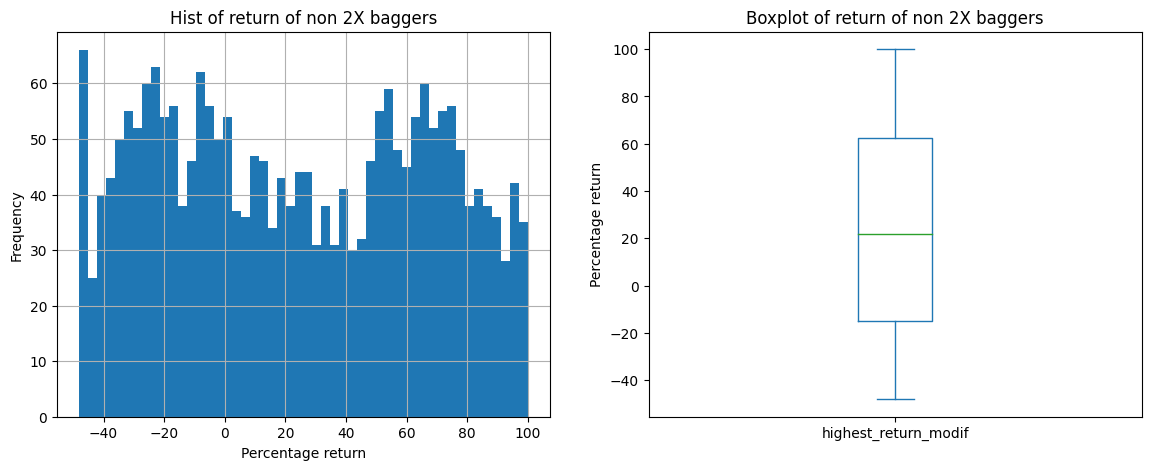

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of non 2X baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of non 2X baggers")
ax[1].set_ylabel("Percentage return");

In [62]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].describe()

count    1892.000000
mean      326.470846
std       215.969857
min       100.060000
25%       153.135000
50%       250.540000
75%       443.002500
max       948.920000
Name: highest_return_modif, dtype: float64

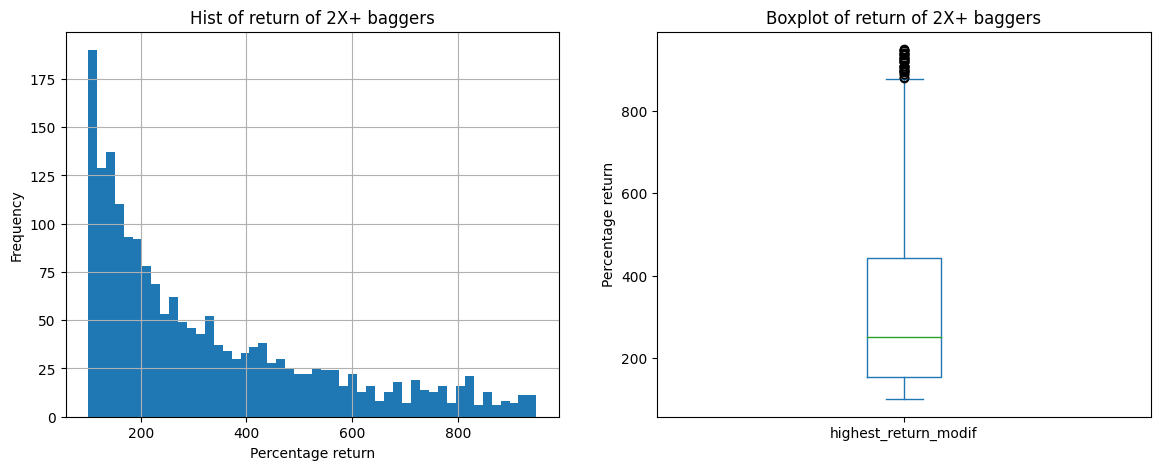

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of 2X+ baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of 2X+ baggers")
ax[1].set_ylabel("Percentage return");

- 54% of the companies from the database do not provide more than 100% return. These companies provide an average return of 23.5% with a min of -48% and a max of 100%
- 56% of the companies from the database  provide more than 100% return. These companies provide an average return of 326% with a min of 100% and a max of 948% 

### how long does it take in average to double bag

In [67]:
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].describe()

count    2709.000000
mean        1.224005
std         0.943039
min         0.000000
25%         0.370000
50%         0.980000
75%         2.010000
max         3.000000
Name: doubling_return_delay, dtype: float64

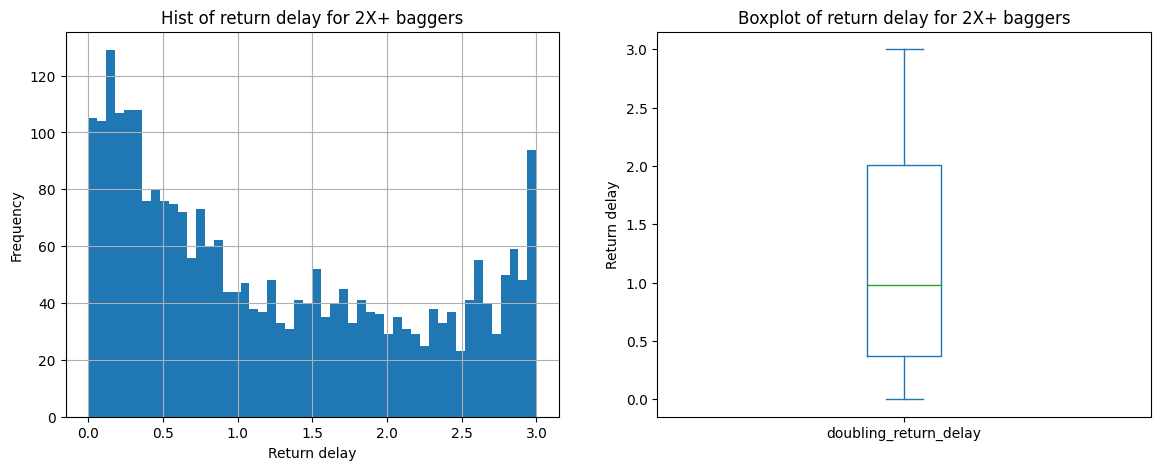

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for 2X+ baggers")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for 2X+ baggers")
ax[1].set_ylabel("Return delay");

* On average the money is doubled in a bit more than a year (1.2 years).
* We can see that the majority of the 2X happends in less than 1.5 years
* The return can wait all the way to 3 years (We limit to three years the investment period on a single company)

### how long does it take to make the highest return modif on the winning ones

In [69]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].describe()

count    3335.000000
mean        1.284837
std         0.965774
min         0.000000
25%         0.400000
50%         1.090000
75%         2.150000
max         3.000000
Name: highest_return_delay, dtype: float64

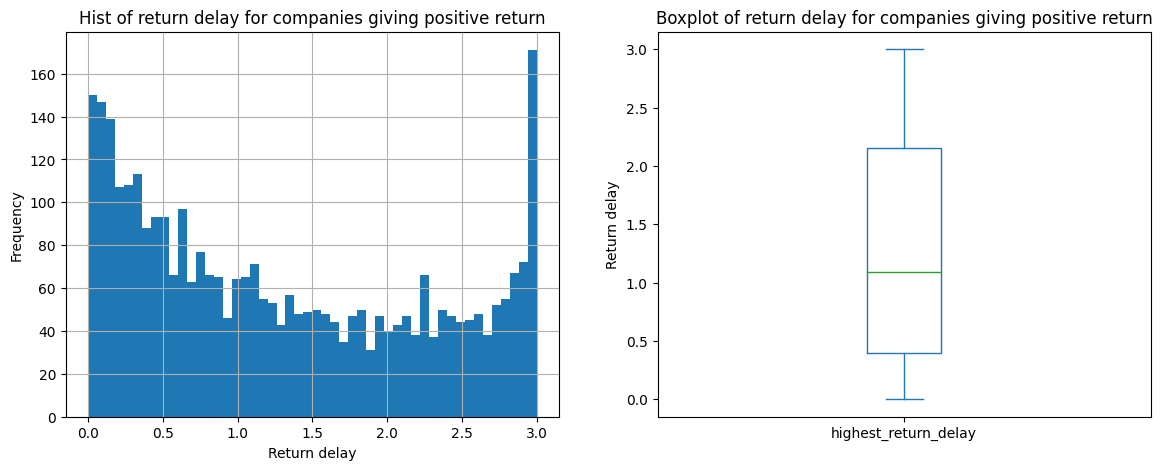

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for companies giving positive return")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for companies giving positive return")
ax[1].set_ylabel("Return delay");

* Similar values than for the doubling 
* Values are just slightly higher

### Basic statistical model

In [71]:
df.columns

Index(['ticker', 'ref_report_date', 'report_date', 'ref_report_date_quarter',
       'report_date_quarter', 'outs_shares1', 'outs_shares2', 'outs_shares3',
       'outs_shares4', 'outs_shares5', 'outs_shares6', 'outs_shares7',
       'outs_shares8', 'outs_shares9', 'outs_shares10',
       'outs_shares_slope_pct_10y', 'outs_shares_slope_pct_5y',
       'min_price_date', 'min_price', 'max_price_date', 'max_price', 'ncavps',
       'liqvps', 'ncav_mos', 'liqv_mos', 'highest_return_delay',
       'doubling_price', 'doubling_date', 'doubling_return_delay',
       'highest_return', 'min_price_modif', 'max_price_modif',
       'ncav_mos_modif', 'liqv_mos_modif', 'doubling_price_modif',
       'highest_return_modif', 'ticker_type'],
      dtype='object')

In [72]:
numeric_cols = [col for col in df.columns if df[col].dtype in (int, float) and "outs_shares" not in col]
numeric_cols = numeric_cols + ["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]

In [73]:
numeric_cols

['min_price',
 'max_price',
 'ncavps',
 'liqvps',
 'ncav_mos',
 'liqv_mos',
 'highest_return_delay',
 'doubling_price',
 'doubling_return_delay',
 'highest_return',
 'min_price_modif',
 'max_price_modif',
 'ncav_mos_modif',
 'liqv_mos_modif',
 'doubling_price_modif',
 'highest_return_modif',
 'outs_shares_slope_pct_10y',
 'outs_shares_slope_pct_5y']

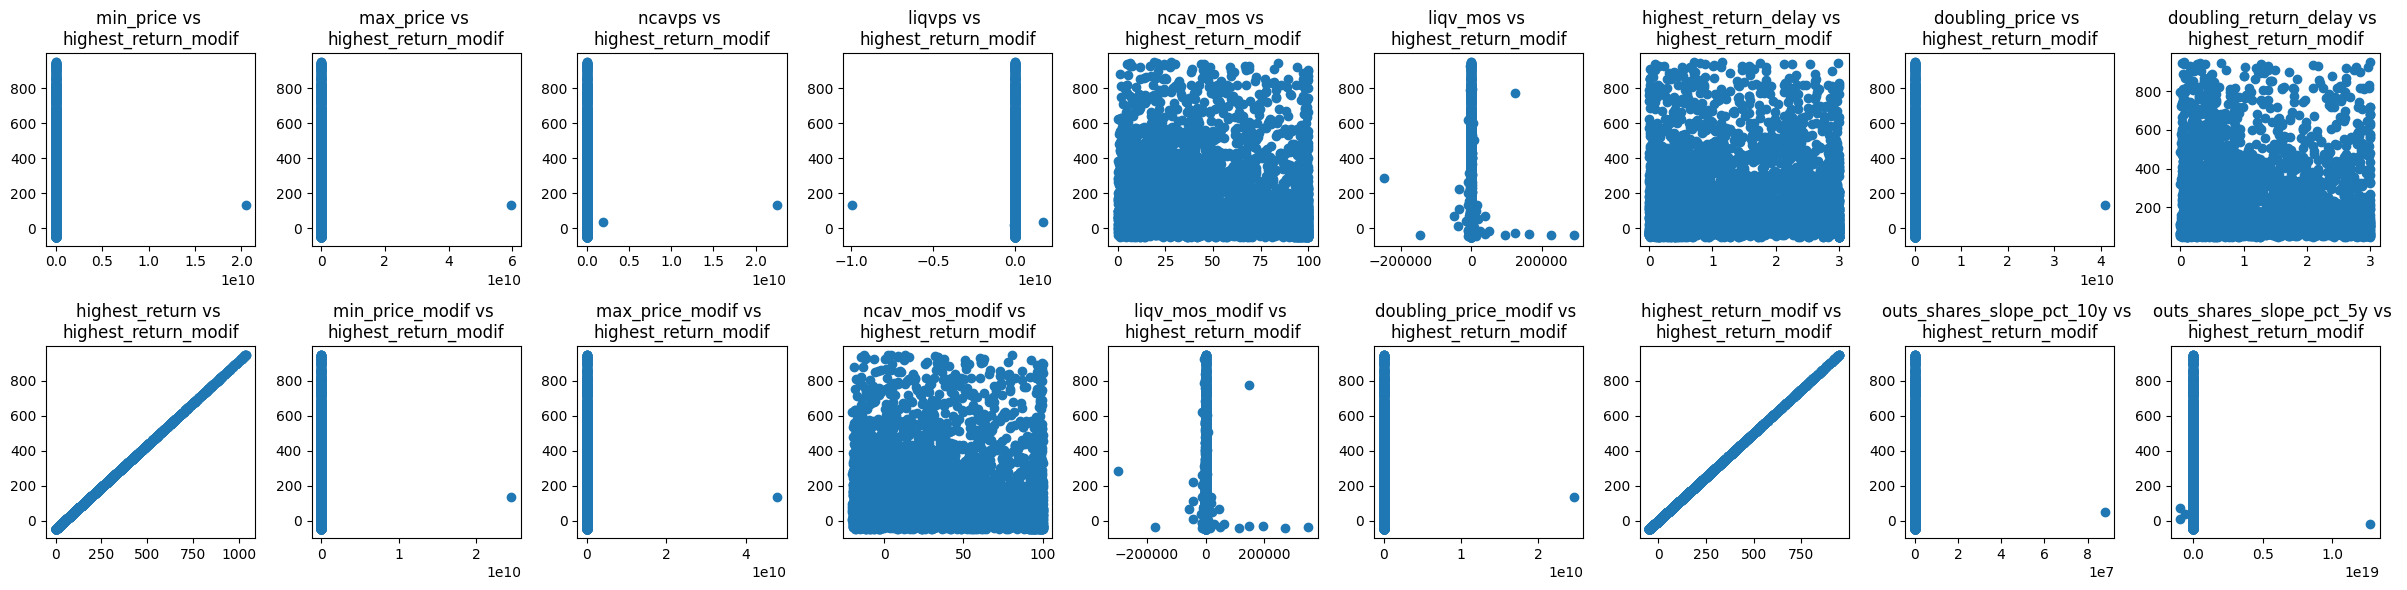

In [74]:
fig, ax = plt.subplots(2, len(numeric_cols) // 2 + len(numeric_cols) % 2, figsize=(24, 6))
for idx, col in enumerate(numeric_cols):
    idx0, idx1 = (
        idx // (len(numeric_cols) // 2),
        idx % (len(numeric_cols) // 2 + len(numeric_cols) % 2)
    )
    ax[idx0, idx1].scatter(df_wo_outliers[col], df_wo_outliers["highest_return_modif"])
    ax[idx0, idx1].set_title(f"{col} vs \nhighest_return_modif")
plt.tight_layout()

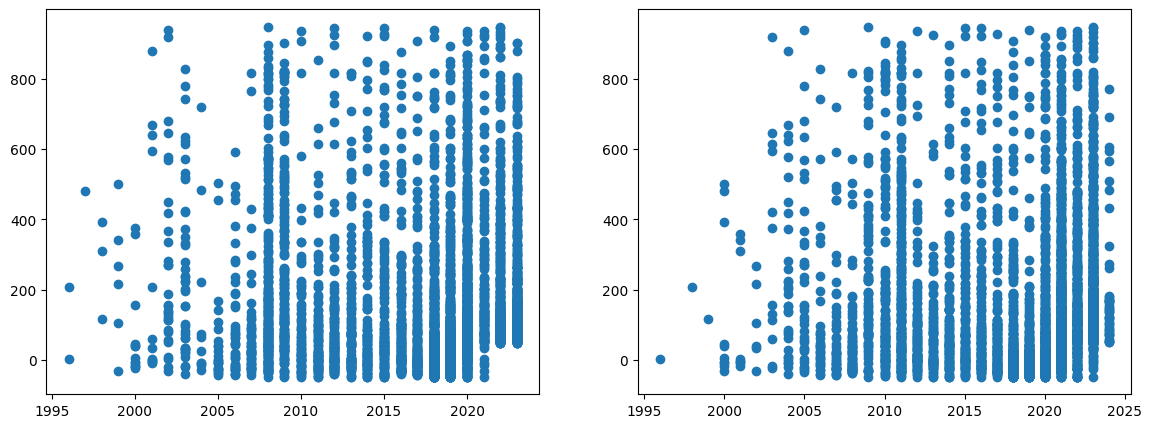

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["min_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])
ax[1].scatter(df_wo_outliers["max_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])

* This vision per year is quite sparse

### Dummy classif task

In [76]:
df_wo_outliers["label"] = df_wo_outliers["highest_return_modif"] > 80

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [101]:
data = df_wo_outliers.copy()
data = data.dropna()
data = data[data["liqv_mos"] != -np.Inf]
X = data[numeric_cols].copy()
X = X.drop(columns=["highest_return_modif", "highest_return", "max_price", "max_price_modif", "highest_return_delay", "doubling_return_delay", "doubling_price", "doubling_price_modif"], axis=1)
y = data["label"].copy()
del data

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [103]:
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, random_state=42)

In [104]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300, random_state=42)

In [105]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [106]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.98      0.47      0.64       335
        True       0.88      1.00      0.93      1243

    accuracy                           0.89      1578
   macro avg       0.93      0.74      0.79      1578
weighted avg       0.90      0.89      0.87      1578



In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.36      0.15      0.21        59
        True       0.80      0.93      0.86       220

    accuracy                           0.76       279
   macro avg       0.58      0.54      0.54       279
weighted avg       0.71      0.76      0.72       279



In [108]:
feats = dict(zip(rf.feature_names_in_, rf.feature_importances_))

In [109]:
feats = dict(sorted(feats.items(), key=lambda x: x[1], reverse=False))

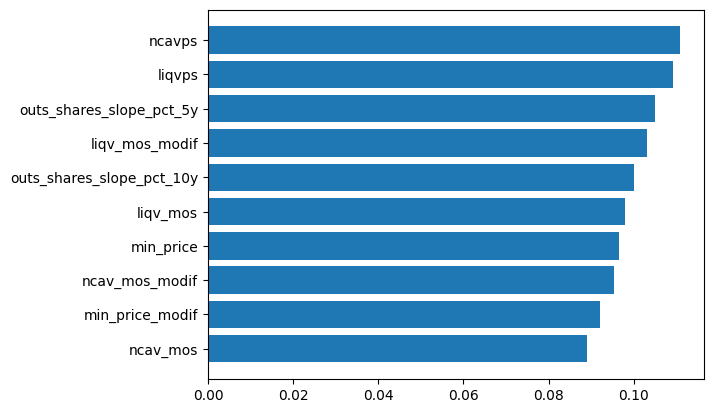

In [110]:
plt.barh(y=list(feats.keys()), width=list(feats.values()));

For now it seems like diversification is the most important thing to consider. More analysis should be carried out

### Average return for a specific case

I consider the companies with a mos of at least 33% and not diluting shares significantly (slope < 20%). What would be the average return in that case

In [111]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20), "highest_return_modif"].describe()

count    1969.000000
mean      175.678989
std       225.773659
min       -48.000000
25%        16.460000
50%        91.430000
75%       254.410000
max       946.290000
Name: highest_return_modif, dtype: float64

In [112]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["highest_return_modif"] < 0), "highest_return_modif"].shape, \
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["highest_return_modif"] > 0), "highest_return_modif"].shape

((393,), (1573,))

If we focus on the companies that have a mos > 33% and not diluting many shares we have:
* an average return of 175% with a min of -48% and a max of 946%
* 393 losing investments and 1573 winning investments

### Simple total return model

In [113]:
df_wo_outliers["min_price_date"].apply(lambda x: x.year).value_counts()

min_price_date
2018    613
2020    608
2019    485
2023    472
2022    337
2008    221
2009    166
2016    145
2017    142
2021    133
2012    119
2015    119
2014    109
2013    103
2011     94
2010     72
2007     51
2003     42
2006     40
2002     30
2005     23
2001     12
2000     12
2004     10
1999      6
1998      3
1996      2
1997      1
Name: count, dtype: int64

I have an initial capital of 10000€ and I want to know how much a have at the end of the period.

For each investment I will put 1k€

In [114]:
buynsell_info = pd.concat([df_wo_outliers[["ticker", "min_price_date"]], df_wo_outliers[["ticker", "max_price_date", "highest_return_modif"]]], axis=0)
buynsell_info = buynsell_info.reset_index(drop=True)
buynsell_info["flag"] = "buy"
buynsell_info.loc[pd.isna(buynsell_info["min_price_date"]), "flag"] = "sell"

In [115]:
buynsell_info["all_dates"] = None
buynsell_info.loc[~pd.isna(buynsell_info["min_price_date"]), "all_dates"] = buynsell_info["min_price_date"]
buynsell_info.loc[~pd.isna(buynsell_info["max_price_date"]), "all_dates"] = buynsell_info["max_price_date"]

In [116]:
buynsell_info = buynsell_info.sort_values(by=["all_dates", "flag"], ascending=True)

In [117]:
solde = 10000
starting_solde = solde
buying_amount = 1000
invest_hash = {}
if buynsell_info.loc[0, "flag"] == "sell":
    print("The row having the oldest date must have a buy flag")
for idx, row in buynsell_info.iterrows():
    if row["flag"] == "buy":
        if solde > 0:
            if row["ticker"] not in invest_hash:
                invest_hash[row["ticker"]] = min(buying_amount, solde)
                solde -= min(buying_amount, solde)
        else:
            continue
    if row["flag"] == "sell":
        if row["ticker"] in invest_hash:
            amount = invest_hash.pop(row["ticker"])
        solde += amount * (row["highest_return_modif"] / 100)

In [118]:
invest_hash

{}

In [119]:
solde

2857733.1494979253

In [120]:
str(buynsell_info.iloc[0]["all_dates"].date()), str(buynsell_info.iloc[len(buynsell_info) - 1]["all_dates"].date())

('1996-03-08', '2024-01-04')

In [122]:
(solde - starting_solde) * 100 / starting_solde

28477.33149497925

In [123]:
cagr = ((solde/starting_solde)**(1/23) - 1) * 100
cagr

27.87438292648026

With 10k€ on July 8th 1996 we would have 2.M€ on January 4th 2024. For a CAGR of 27.8%

### Next steps / possible improvements

- The number of companies is quite big. It would interesting to cleverly select a more "realistic" number of companies. For example, choosing the companies that I am going to find on the brokers
- We assume that we always invest 1k. But after a good return has been achieved (say, 50k) we will be able to put more initial investment over time, making the total return potentially even higher
- Find what other features might help with a better statistical prediction of good vs bad performing companies. Play also with the threshold
- Carry out the same exercise of the simple total return model but always capping the max return at 100%
- A more complex, yet realistic model can be achieved if we take into consideration whether the company has improved the financials during the period we are invested in. That would help make more educated decisions on whether to stay invested or find a more promising opportunity (Not the highest priority
- We should also add the delisted companies (so run the backtesting pipeline with the delisted tickers) and re-run the whole thing